# **Bayesian Updating with Conjugate Priors**
---
---

### **Conjugate Prior:** posterior with same distribution as the prior
- certain likelihood functions with specific prior distributions -> posterior having the same distribution as the prior



> 
> ### P(θ) such that P(θ|D) = P(θ)
> - chosen *Prior Distribution* for the *Likelihood Function* = a *Posterior Distribution* the same as the *Prior Distribution* 
> - Allows you to skip `posterior = likelihood * prior` computation (if you know it is a conjugate prior)
> - implied **Closed-Form Expression** for the *prior disribution* (you already know what the maximum posterior will be)
>      - *Closed-Form Expression* = finite number of standard operations

### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats

## Calculate Posterior of Binomial Likelihood (Conjugate Priors)
---
---
Medium Article: [Conjugate Prior](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb)

- `Θ` = probability of success
- goal = pick the `Θ` that maximizes the postrior probability

# **Conjugate Prior**
---
---
### Able to Skip Computationally Expensive *`posterior = likelihood * prior`* computation 
Can update by only modifying *prior distribution P(Θ)* (hyperparameters) vs. computing integrals 


# Beta Distributions Conjugate Prior to Binomial Likelihood: 
MIT PDF: [Conjugate Priors: Beta and Normal](https://math.mit.edu/~dav/05.dir/class15-prep.pdf)
MIT PDF: [Beta Distributions](https://math.mit.edu/~dav/05.dir/class14-prep-a.pdf)
Investopedia: [Binomial Distribution](https://www.investopedia.com/terms/b/binomialdistribution.asp)

- Hyperparameters: value controls the unknown `Θ`:
    - **`a`** = Number of Successes
    - **`b`** = Number of Failures
- **`n`** = Number of Trials 
- **`Θ`** = Probability of Success (Hypothesis)

#### Beta Probability Density Function: `f(Θ) = factorial1 * Θᵅ⁻¹ * (1-Θ)ᴮ⁻¹`
#### Models Probability of Success P(Θ)
- Two parameter distribution with a range [0,1]
- `factorial1 = (a+b-1)! / ((a-1)!(b-1)!)`
    - normalize the PDF to have a total probability of 1


#### Binomial Distribution Function: `f(a:n,Θ) = ₙC𝛼 aΘᵅ (1-Θ)ᴺ⁻ᵅ`
#### Models Number of Success P(X|Θ)
- *Binomial* means only two terms
- **`ₙCₓ`** = sample of `x` elements from a set of `n` objects where order does not matter
    - aka: `( n! / (x!(n-x)!) )`
- Mean = `nΘ`
- Variance = `nΘ(1-Θ)`
>   `Θ` or P-Value
>    - `Θ = 0.5` = distribution **SYMETRIC** around the *MEAN*
>    - `Θ > 0.5` = distribution **SKEWED** to the *LEFT*
>    - `0 < 0.5` = distribution **SKEWED** to the *RIGHT*

#### Posterior Distribution 
- Also becomes a beta distribution with parameters `(a₁ + a₂, b₁ + b₂)`
    - sequential estimation: updating counts after each observation (same result as batch estimation)
- `P(Θ) such that P(Θ|D) = P(Θ)` = Conjugate Prior = Convenient Prior
- *only need to normalize the posterior if you are comparing different posterior calculations* 



### **IFF** your *prior distribution* has a *closed-form expression*:
 - MAP already known
 - **Closed-Form Expression** = finite number of standard operations
    - Closed-Form Formulas of Conjugate Priors Lighten Computation 

---
>### Pre-Known Conjugate Priors
>> Beta Distribution Posterior: 
>> - Beta Prior * **Bernoulli** Likelihood = Beta Posterior
>> - Beta Prior * **Binomial** Likelihood = Beta Posterior
>> - Beta Prior * **Negative Binomial** Likelihood = Beta Posterior 
>> - Beta Prior * **Geometric** Likelihood = Beta Posterior 
> 
>> Gamma Distribution Posterior: 
>> - Gamma Prior * **Poisson** Likelihood = Gamma Posterior 
>> - Gamma Prior * **Exponential** Likelihood = Gamma Posterior 
>
>> Normal Posterior: 
>> - Normal Prior * **Normal** Likelihood (mean) = Normal Posterior 
>
---

# Coin Toss Conjugate Priors
---

In [2]:
# Generate Dataset
success_prob = 0.3
new_data_points = 10
data = np.random.binomial(n=1, p=success_prob, size=new_data_points)

# Θ
theta_range = np.linspace(0,1,1000)

# Prior P(Θ)
    # Beta Distribution: Probability Distribution on Probabilities
    # Cumulative Distribution Function (CDF): Probability 'X' will take on a value less than or equal to 'x'
Alpha = 2
Beta = 8
theta_range_cdf = theta_range + 0.0001
cdf_prior = stats.beta.cdf(x=theta_range_cdf, a=Alpha, b=Beta) - stats.beta.cdf(x=theta_range, a=Alpha, b=Beta)
prior = stats.beta.pdf(x=theta_range, a=Alpha,b=Beta)

# Likelihood P(X|Θ)
# set of all X such that Θ
    # Binomial Distribution: probability of 'k' successes in 'n' periods
    # Probability Mass Function (PMF): probability that 'X' = 'k'
        # k = number of successes
        # n = number of trials 
        # p = probability of success
likelihood = stats.binom.pmf(k=np.sum(data), n=len(data), p=theta_range)

# Posterior P(Θ|X)
# set of all Θ such that X
posterior = likelihood * cdf_prior 
normalized_posterior = posterior / np.sum(posterior)


### Above code ^: Posterior Calculation is Expensive
1. Computing Posterior For Every `Θ`
    - normalization aside -> Goal is to find the *maximum* of the posteriors (Maximum a Posteriori - MAP)
2. **No Closed-Form Formula** of Posterior Distribution 
    - *Closed-Form Expression* = finite number of standard operations
    - find MAP by numerical optimization (gradient descent or newtons method)

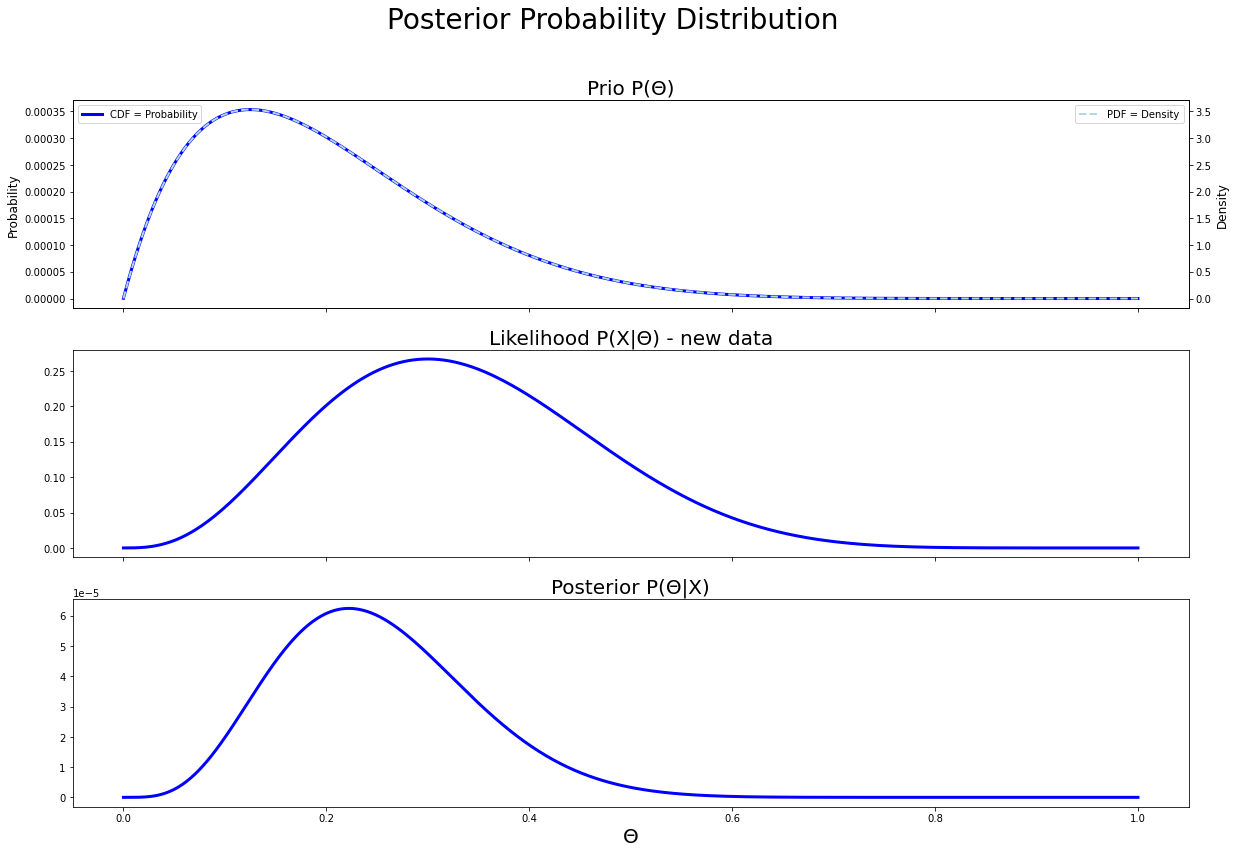

In [3]:
fig, axes = plt.subplots(3,1, sharex=True, figsize=(20,13))
plt.xlabel('Θ', fontsize=20)
plt.suptitle("Posterior Probability Distribution", fontsize=28)

axes[0].plot(theta_range, cdf_prior, label='CDF = Probability', linewidth=3, color='blue')
axes[0].set_ylabel("Probability", fontsize=12)
axes[0].set_title("Prio P(Θ)", fontsize=20)
axes[0].legend(loc=2)

ax02 = axes[0].twinx()
ax02.plot(theta_range, prior, label= 'PDF = Density', linewidth=2, linestyle='--', color='lightblue')
ax02.set_ylabel("Density", fontsize=12)
ax02.legend(loc=1)

axes[1].plot(theta_range, likelihood, label='Likelihood', linewidth=3, color='blue')
axes[1].set_title("Likelihood P(X|Θ) - new data", fontsize=20)

axes[2].plot(theta_range, posterior, label="Posterior", linewidth=3, color='blue')
axes[2].set_title("Posterior P(Θ|X)", fontsize=20)

plt.show()